In [2]:
import pandas as pd

C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('dataset_fluffy_final.csv', sep=';')

In [4]:
#Ищу среднее, т.к. в задании не написано, что нужно учитывать привязку к ферме\курятнику, а данные с некоторых из них могут быть выбросами, не отражающамя показатели породы
df_group = df.groupby(["breed_type", "gender", "daynum"], as_index=False).target_weight.agg(target_weight='mean')
res = (df_group
       .groupby(["breed_type", "gender"], as_index=False)
       .apply(lambda gdf: (
    gdf.assign(speed=
               lambda x:
               (float(x.target_weight.tail(1)) - float(x.target_weight.tail(10).head(1))) / len(
                   x.target_weight.tail(10))
               )))).groupby(["breed_type", "gender"], as_index=False).first()
res[["breed_type", "gender", "speed"]].sort_values("speed")

C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\3713373988.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (float(x.target_weight.tail(1)) - float(x.target_weight.tail(10).head(1))) / len(
C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\3713373988.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (float(x.target_weight.tail(1)) - float(x.target_weight.tail(10).head(1))) / len(
C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\3713373988.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (float(x.target_weight.tail(1)) - float(x.target_weight.tail(10).head(1))) / len(
C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\3713373988.py:5: DeprecationWarning: DataFrameGroupBy.apply operated

,breed_type,gender,speed
0,Cobb,female,0.083588
2,Cobb,mix,0.089048
1,Cobb,male,0.098667


In [5]:
df_mean_weight = df.groupby(["breed_type", "gender"], as_index=False).target_weight.agg(
    target_weight='mean').sort_values("target_weight")
df_mean_weight.reset_index(inplace=True)
df_mean_weight

,index,breed_type,gender,target_weight
0,0,Cobb,female,1.485770
1,2,Cobb,mix,1.615244
2,1,Cobb,male,1.727935


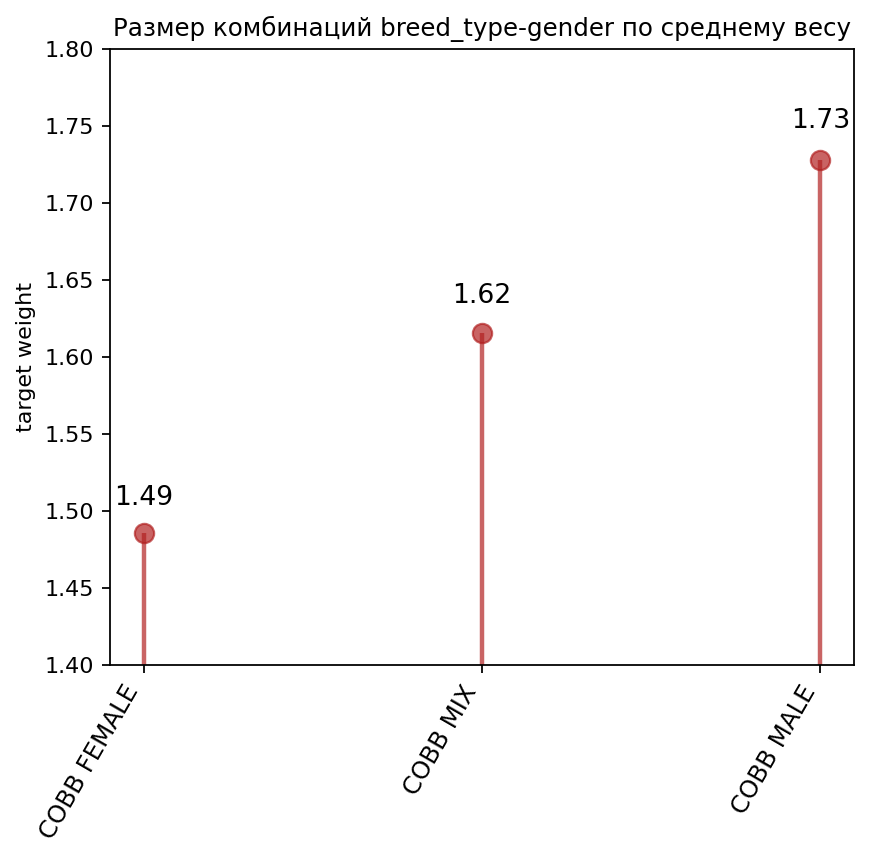

In [6]:
from matplotlib import pyplot as plt

pairs = [f"{row[1]} {row[2]}".upper() for row in df_mean_weight.itertuples(index=False)]

fig, ax = plt.subplots(figsize=(6, 5), dpi=160)
ax.vlines(x=pairs, ymin=0, ymax=df_mean_weight.target_weight, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=pairs, y=df_mean_weight.target_weight, s=75, color='firebrick', alpha=0.7)

ax.set_title('Размер комбинаций breed_type-gender по среднему весу', fontdict={'size': 11})
ax.set_ylabel('target weight')
ax.set_xticks(df_mean_weight.index)
ax.set_xticklabels(pairs, rotation=60, fontdict={'horizontalalignment': 'right', 'size': 11})
ax.set_ylim(1.4, 1.8)

for row in df_mean_weight.itertuples():
    ax.text(row.Index, row.target_weight * 1.01, s=round(row.target_weight, 2), horizontalalignment='center',
            verticalalignment='bottom', fontsize=12)

plt.show()

In [7]:
def compare_gender(x):
    male_weight = x[x["gender"] == "male"].target_weight
    mix_weight = x[x["gender"] == "mix"].target_weight
    female_weight = x[x["gender"] == "female"].target_weight
    return (
            (male_weight.min() < mix_weight.min() and mix_weight.max() < female_weight.max())
            or
            (female_weight.min() < mix_weight.min() and mix_weight.max() < male_weight.max())
    )


r = (df_group
     .groupby("daynum", as_index=False)
     .apply(lambda gdf: (
    gdf.assign(hypot_work=lambda x: compare_gender(x))))).groupby("daynum", as_index=False).first()
print(f'Гипотеза не работает, т.к. она подтверждается только в {len(r[r["hypot_work"] == True]) / len(r) * 100}% дней')
r[["daynum", "hypot_work"]]

Гипотеза не работает, т.к. она подтверждается только в 62.745098039215684% дней


C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\666723429.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gdf: (


,daynum,hypot_work
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
5,5,False
6,6,False
7,7,False
8,8,False
9,9,False


C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\2807801717.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('daynum', 'target_weight',


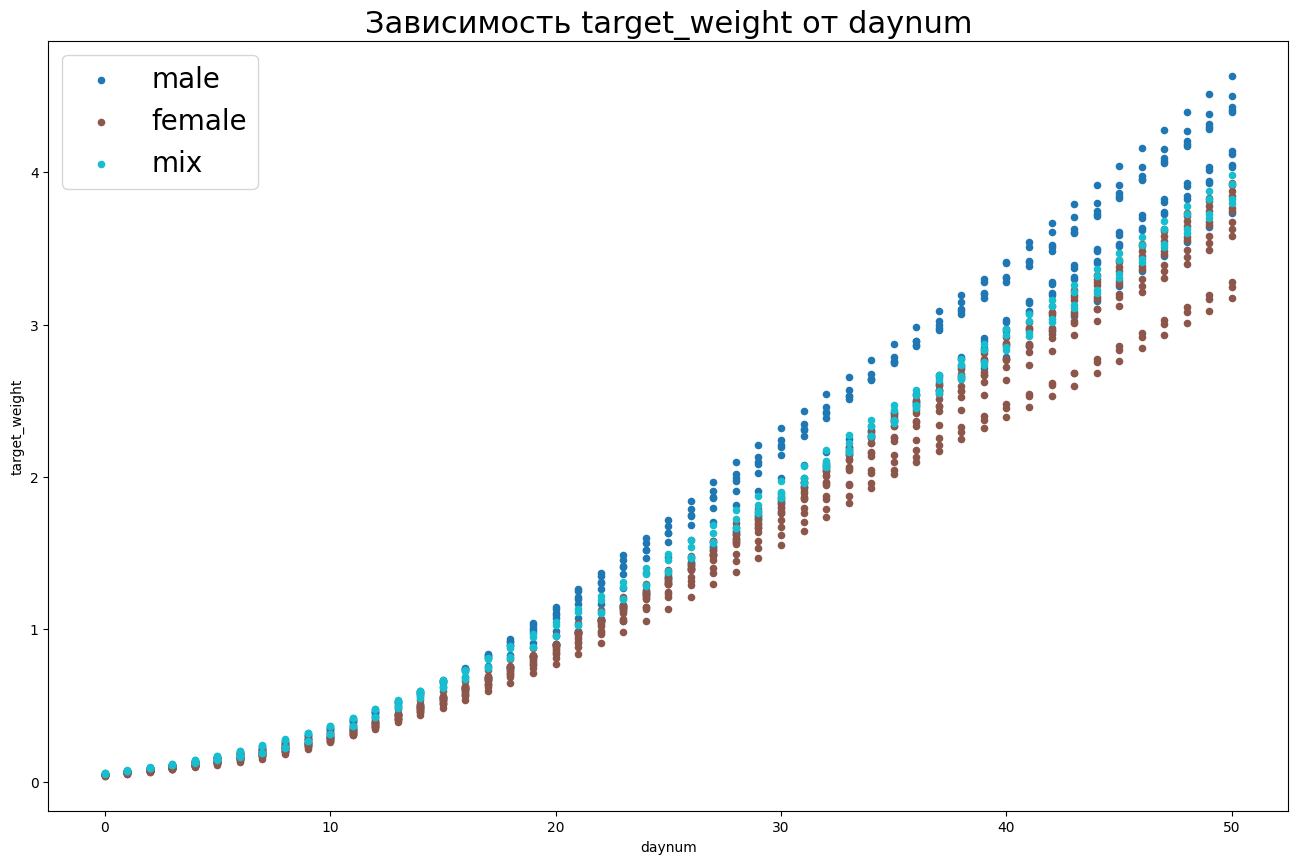

In [8]:
categories = df.gender.unique()
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('daynum', 'target_weight',
                data=df[df["gender"] == category],
                s=20, c=colors[i], label=str(category))

plt.gca().set(xlabel='daynum', ylabel='target_weight')
plt.title("Зависимость target_weight от daynum", fontsize=22)
plt.legend(fontsize=20)

C:\Users\4leom\AppData\Local\Temp\ipykernel_18184\3565926074.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('daynum', 'target_weight',


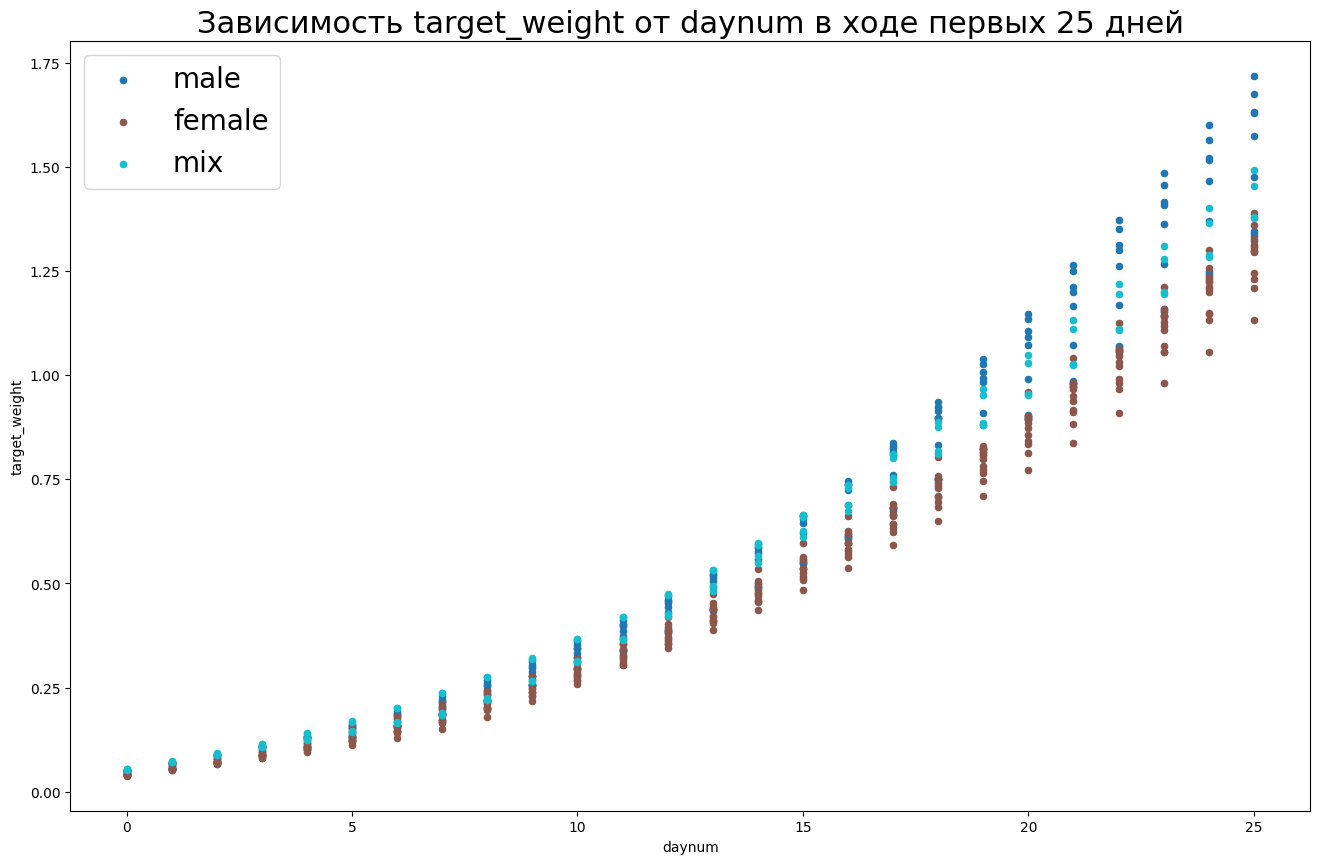

In [9]:
df_first_25 = df[df["daynum"] < 26]
categories = df_first_25.gender.unique()
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('daynum', 'target_weight',
                data=df_first_25[df_first_25["gender"] == category],
                s=20, c=colors[i], label=str(category))

plt.gca().set(xlabel='daynum', ylabel='target_weight')
plt.title("Зависимость target_weight от daynum в ходе первых 25 дней", fontsize=22)
plt.legend(fontsize=20)